# Lab 1

In [1]:
# !sudo -H pip3 install opencv-python

In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Загружаем исходные данные

In [3]:
train = np.loadtxt('./data/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/test.csv', delimiter=',', skiprows=1)

In [4]:
train_label = train[:, 0]
train_x = train[:, 1:]

In [5]:
train_x.shape

(42000, 784)

## Визуализируем исходные данные

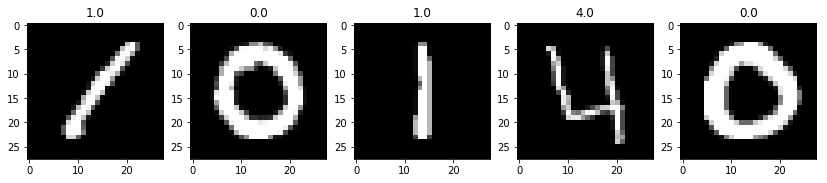

In [6]:
train_img = np.reshape(train_x,(len(train_x),28,28))
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Применяем метод главных компонент

In [7]:
from sklearn.decomposition import PCA

pca = PCA(.90)
pca.fit(train_x)
x_tr = pca.transform(train_x)
y_tr = pca.transform(test)

## Логистическая регрессия

In [8]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(solver = 'lbfgs')
logReg.fit(x_tr, train_label)
predictions = logReg.predict(y_tr)
predictions.shape

(28000,)

## Визуализируем предсказания

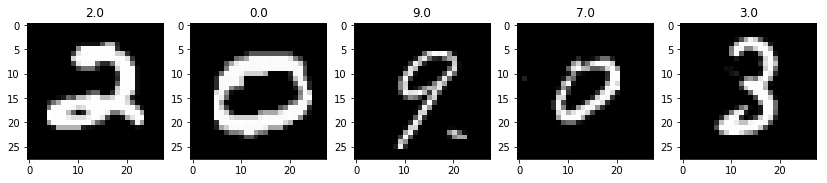

In [9]:
test_img = np.reshape(test, (len(test), 28, 28))
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % predictions[i - 1]);

## Готовим файл для отправки

In [10]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(predictions, 1):
        dst.write('%s,%s\n' % (i, int(p)))

In [11]:
!head submit.txt

ImageId,Label
1,2
2,0
3,9
4,7
5,3
6,7
7,0
8,3
9,0


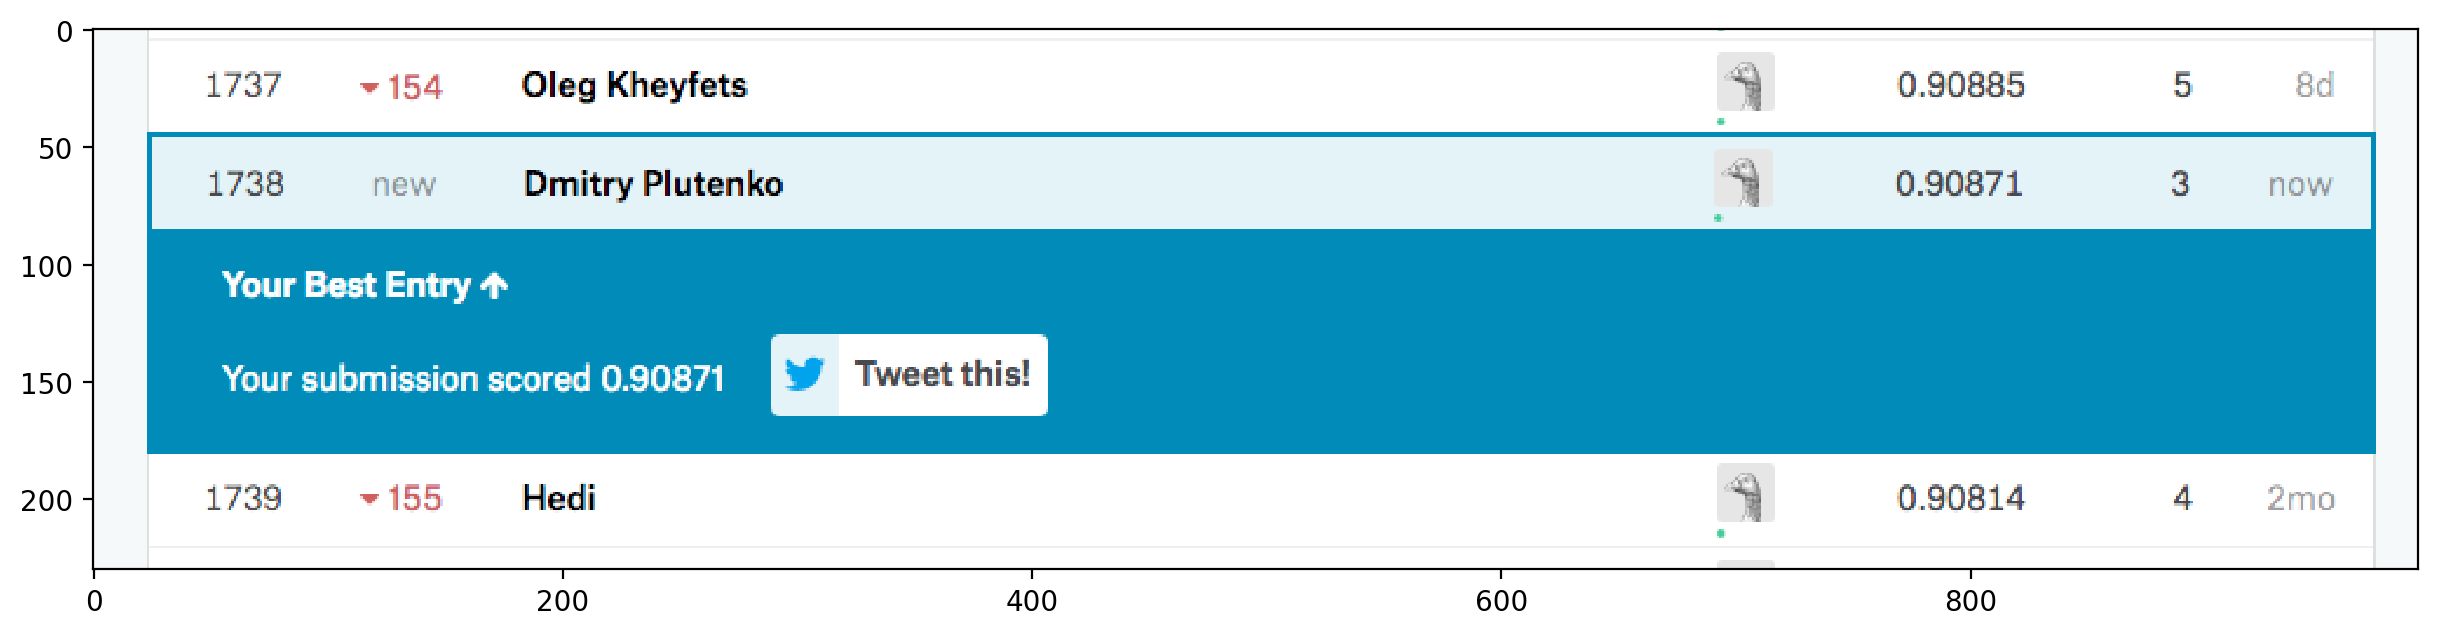

In [12]:
import matplotlib.image as mpimg
result_img = mpimg.imread('kaggle_result.png')
plt.figure(num=None, figsize=(15, 10), dpi=200, facecolor='w', edgecolor='k')
imgplot = plt.imshow(result_img)
plt.show()